# This is the Analysis of the First Part

In [1]:
# This is Matanya's change
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import chardet

with open("AMI_GSE66360_series_matrix.csv", "rb") as f:
    result = chardet.detect(f.read(100000))  # Read first 100,000 bytes
    print(result) 



{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [3]:
ROWS_TO_SKIP = 59
FILE_PATH = 'AMI_GSE66360_series_matrix.csv'

raw_df = pd.read_csv(FILE_PATH, skiprows=ROWS_TO_SKIP, encoding=result['encoding'], header=None)
labels = raw_df.iloc[0, 1:].reset_index(drop=True)

gene_expression = raw_df.iloc[1:].set_index(0)  # Set first column as index
gene_expression.columns = gene_expression.iloc[0]  # Use first row as column headers
gene_expression = gene_expression.drop(index=gene_expression.index[0])  # Drop the now redundant row

print(labels)
# print(gene_expression.head())
# print(gene_expression.shape)
# print(labels.shape)


C:\Users\wmata\AppData\Local\Temp\ipykernel_32100\3353322601.py:4: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(FILE_PATH, skiprows=ROWS_TO_SKIP, encoding=result['encoding'], header=None)


0     H
1     H
2     H
3     H
4     H
     ..
94    M
95    M
96    M
97    M
98    M
Name: 0, Length: 99, dtype: object


##### a. High level description of the data and some pre-processing

1) How many genes profiled?


In [4]:
num_genes = gene_expression.shape[0]
print(f"There are {num_genes} genes profiled in the dataset.")

There are 54675 genes profiled in the dataset.


2) How many samples (subjects/patients) in total?


In [5]:
subject = gene_expression.shape[1]
print(f"There are {subject} subjects profiled in the dataset.")

There are 99 subjects profiled in the dataset.


3) How many samples in each class?


In [6]:
healthy_count = (labels == "H")
disease_count = (labels == "M")  # Assuming "D" is the other class

print(f"Healthy samples: {healthy_count.sum()}")
print(f"Disease samples: {disease_count.sum()}")

Healthy samples: 50
Disease samples: 49


4) If there are missing values, then remove the entire row
(gene) from the data matrix.
How many rows left now?

In [7]:
cleaned_gene_expression = gene_expression.apply(pd.to_numeric, errors='coerce')
cleaned_gene_expression = cleaned_gene_expression.dropna(axis=0)
print(f"There are {cleaned_gene_expression.shape[0]} rows left after removing rows with missing values.")

There are 54628 rows left after removing rows with missing values.


5) Pick 20 genes at random. Draw histograms comparing
expression levels of each of these genes in the two
classes M and H.

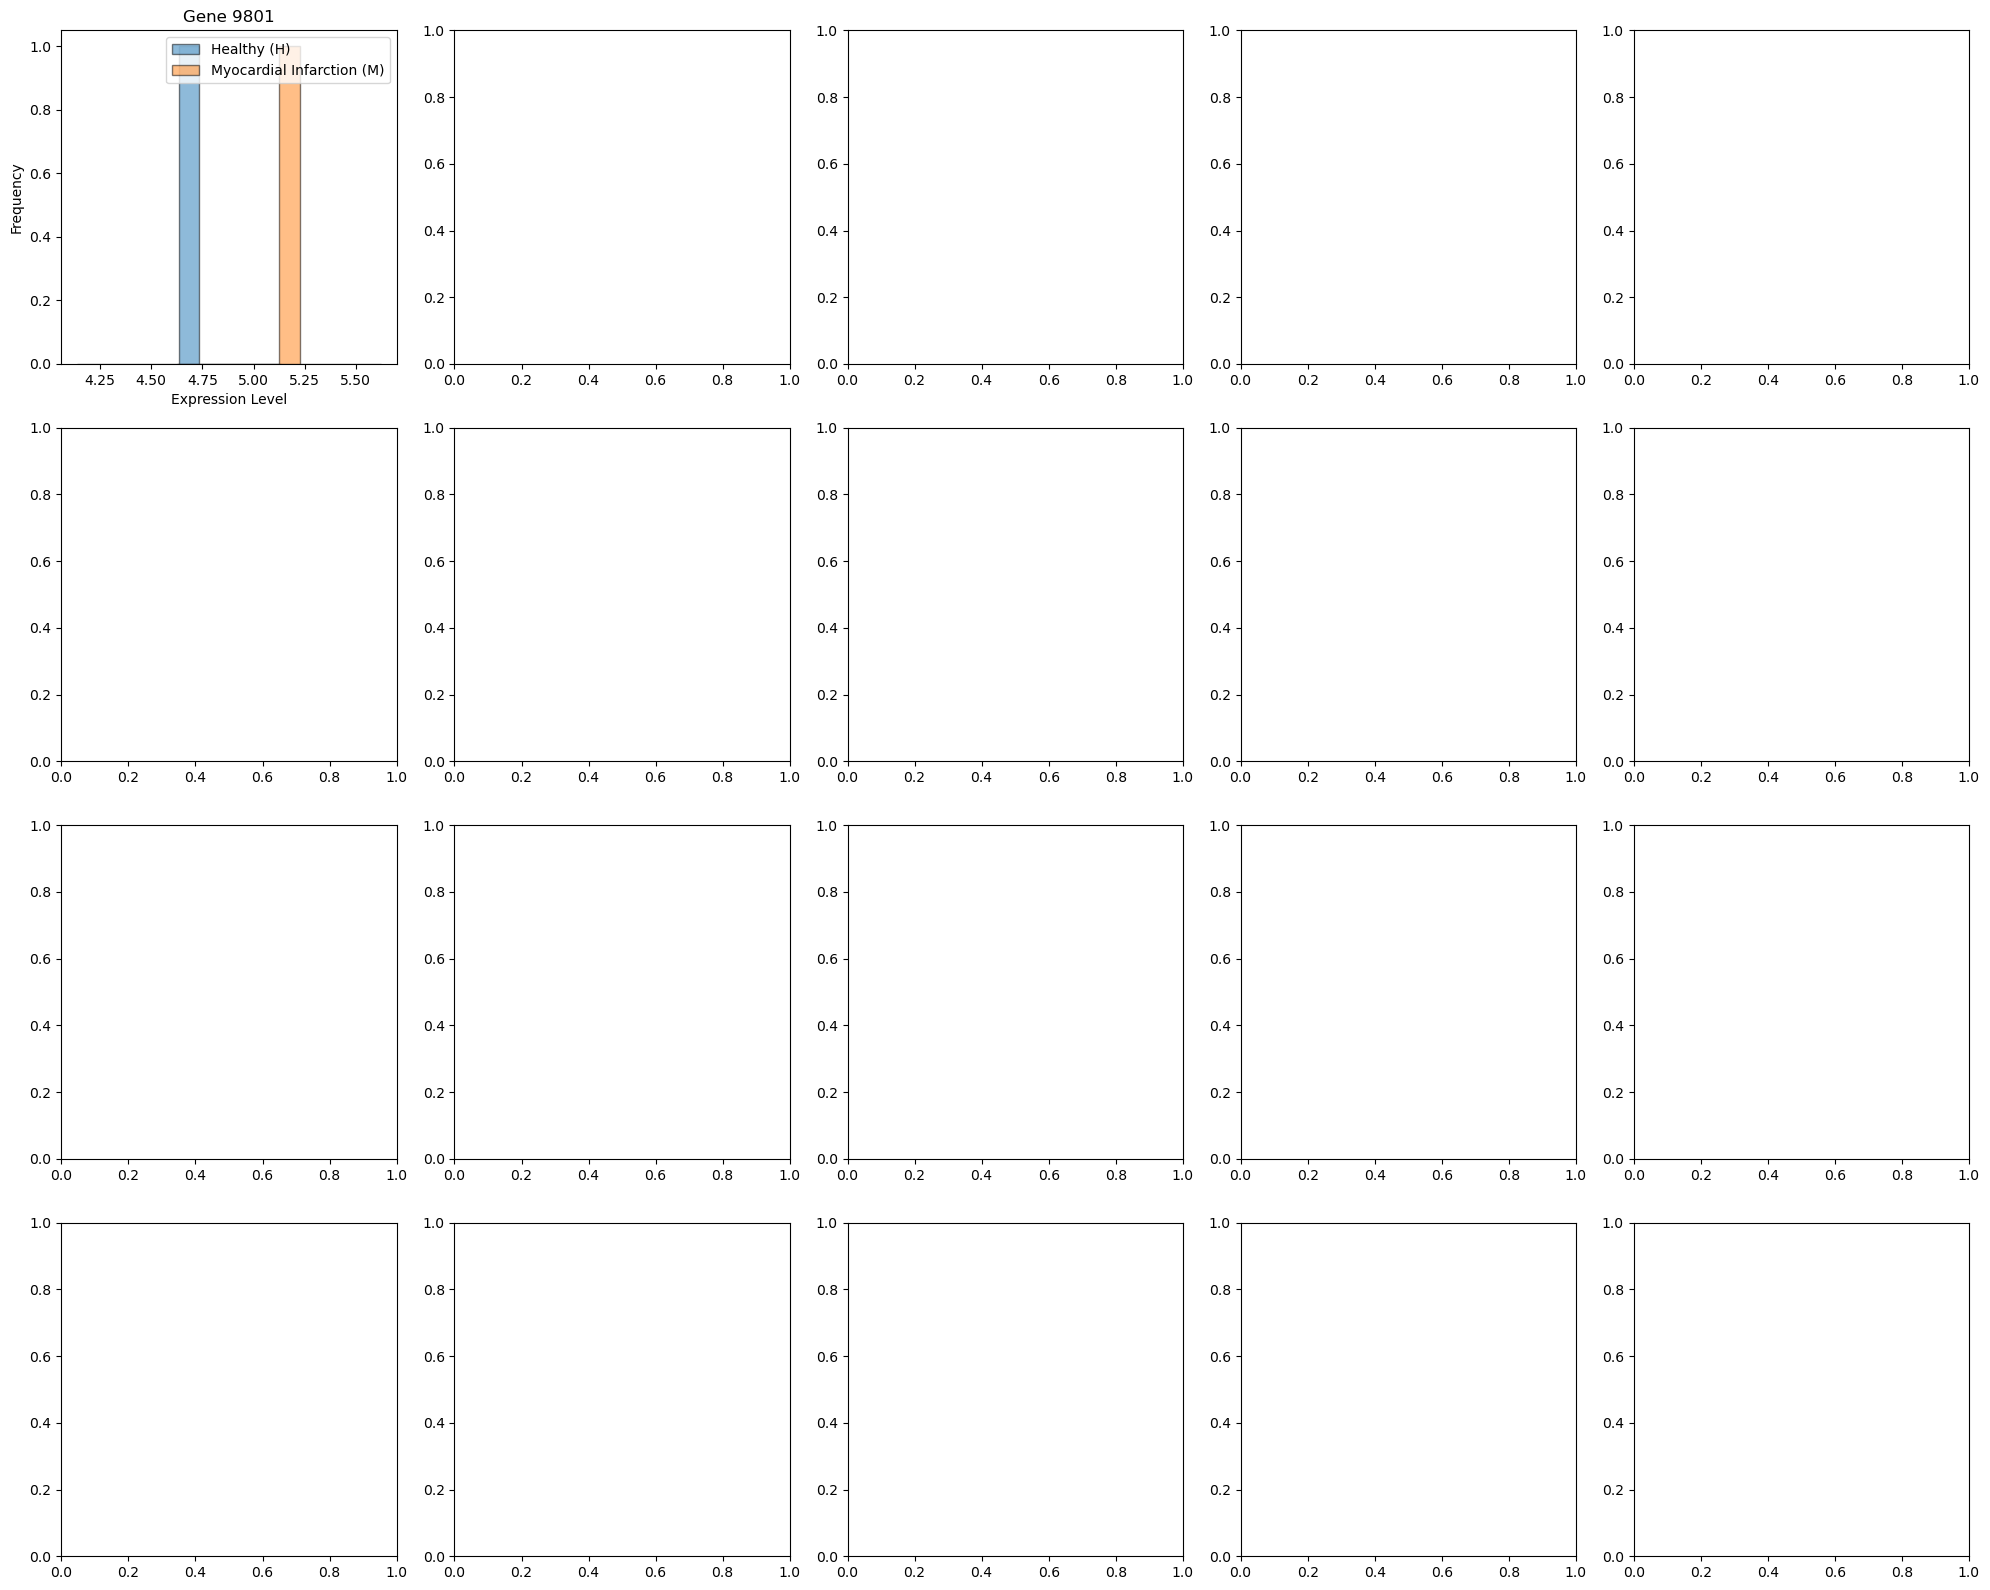

In [10]:
random_genes = np.random.randint(0, cleaned_gene_expression.shape[0], size=20)
healthy_samples = labels[labels == "H"].index
disease_samples = labels[labels == "M"].index

# print(healthy_samples)

# for gene in random_genes:
#     plt.figure(figsize=(6, 4))
#     plt.hist(gene_expression.iloc[gene, healthy_samples], alpha=0.5, label="Healthy (H)", bins=10, edgecolor='black')
#     plt.hist(gene_expression.iloc[gene, disease_samples], alpha=0.5, label="Myocardial Infarction (M)", bins=10, edgecolor='black')

#     plt.title(f"Gene {gene}")
#     plt.xlabel("Sample")
#     plt.ylabel("Expression")
#     plt.legend()
#     plt.show()


# Create a single figure with subplots
fig, axes = plt.subplots(4, 5, figsize=(20, 16))

# Flatten axes for easy indexing
axes = axes.flatten()

# Plot each gene in a separate subplot
for i, gene in enumerate(random_genes[0:1]):
    ax = axes[i]  # Get current subplot
    
    ax.hist(np.mean(gene_expression.iloc[gene, healthy_samples]), alpha=0.5, label="Healthy (H)", bins=10, edgecolor='black')
    ax.hist(np.mean(gene_expression.iloc[gene, disease_samples]), alpha=0.5, label="Myocardial Infarction (M)", bins=10, edgecolor='black')

    ax.set_title(f"Gene {gene}")
    ax.set_xlabel("Expression Level")
    ax.set_ylabel("Frequency")
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()